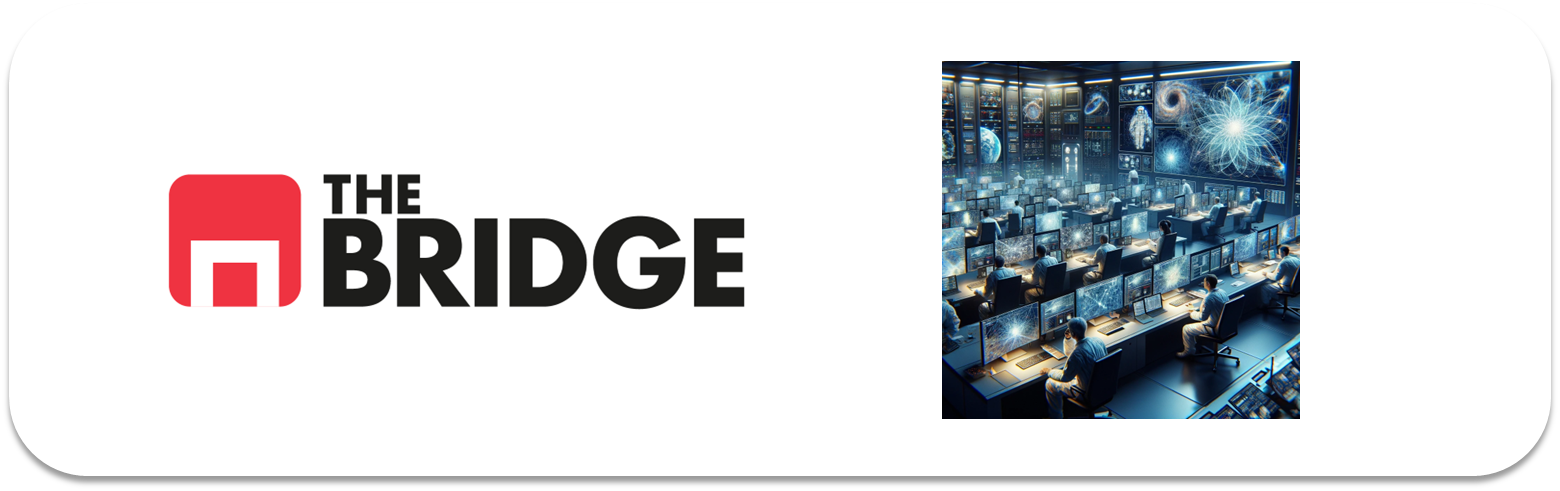

## PRACTICA OBLIGATORIA: **Redes Convolucionales**

* La práctica obligatoria de esta unidad consiste en un ejercicio de construcción de una red convolucional con Keras para la clasificación de imagenes de simpáticos perretes y gatetes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import cv2
import matplotlib.pyplot as plt  
import numpy as np
import os
import pandas as pd
import seaborn as sns

from PIL import Image
from skimage.io import imread
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from tensorflow import keras

from keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPool2D
from keras.models import Sequential
from keras.optimizers import Adam

### Problema de Negocio y dataset

Una conocida empresa de información inmobiliaria utiliza un CAPTCHA visual de perros y gatos para detectar webscrappings intensivos y ataques de denegación de servicio. Últimamente, ha detectado que su sistema está empezando a flojear, es decir que hay muchos sistemas de detección automática de imágenes que son capaces de detectar que es un perro y un gato y salterse el CAPTCHA antirobots. Por eso nos ha pedido que entrenemos un modelo potente de clasificación que emule a estos sistemas con el objetivo de emplear como fotografías para el CAPTCHA aquellas que no sepa detectar este sistema emulador de chicos malos.  

Pues manos a la obra, tenemos que seleccionar en un conjunto de 1000 imágenes aquellas que peor se le daría clasificar a un potencial sistema anti-CAPTCHA.  

Para ello vamos a emplear un conjunto de train de 4000 imágenes de perretes y gatetes que se encuentran distribuidas en "data" en cuatro directorios "github_train_0",  "github_train_1", "githun_train_2" y "github_train_3". Los datos de las imagenes que tenemos que clasificar y luego seleccionar como las más "difíciles" están en "data" en el directorio "github_test".


### Se pide

1. Crear los datasets X,y de train y test, leyendo las imágenes de los directorios correspondientes (tendrás que leer todas las imágenes de los cuatro directorios para train) y a la vez que se leen adpatar su resolución para que todas tengan un tamaño de 32x32. En este caso puedes adaptar las funciones de los ejercicios de la unidad. NOTA: Ten en cuenta que la clase a la que pertenece en la foto está en el nombre del archivo.

2. Crea un modelo DL basado en redes convolucionales con al menos dos juegos Convolucional-Pooling. Sigue todo el proceso de ML (visualización del dataset, MiniEDA, Construcción del modelo)

3. Entrenar el modelo con un callback de Earlystopping con paciencia la que tengas :-). Muestra su historial de entrenamiento.

4. Evalua el modelo, haz un reporte de clasificacion y muestra la matriz de confianza.

5. Es el momento de seleccionar las imagenes: Selecciona el 10% de imágenes mal clasificadas de una y otra clase que tengan el mayor nivel de confianza de que pertenencían a la clase errónea. Es decir las imágenes de perros clasificadas como gatos y con la probabilidad de ser perror más alta.


### Extra (para hacer en clase)

Repite los pasos 3 a 5 utilizando el generador de imágenes sintéticas o Image Augmentation de Keras. 



In [2]:
def read_data(directorio, sw_test = 0, reshape_dim = (32,32)):
    X = [] 
    y = []
    for folder in os.listdir(directorio):        
        if (sw_test == 0 and folder != "github_test") or (sw_test == 1 and folder == "github_test"):
            print(folder)
            if os.path.isdir('/'.join([directorio, folder])):
                for file in os.listdir('/'.join([directorio, folder])):
                    image = imread('/'.join([directorio, folder, file]))
                    image = cv2.resize(image, reshape_dim)
                    label = file[:3]
                    X.append(image)
                    y.append(label)                       
    return np.array(X),np.array(y)

def show_images_batch(pets, names = [], n_cols = 5, size_scale = 2):
    n_rows = ((len(pets) - 1) // n_cols + 1)
    plt.figure(figsize=(n_cols * size_scale, n_rows * 1.1*size_scale))
    for index, pet in enumerate(pets):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(pet, cmap = "Greys")
        plt.axis("off")
        if len(names):
            plt.title(names[index])

In [4]:
X_train,y_train = read_data("./data/")

github_train_0
github_train_1
github_train_2
github_train_3


In [5]:
X_test, y_test = read_data("./data/", sw_test = 1)

github_test


In [6]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', y_test.shape)

X train shape:  (4000, 32, 32, 3)
Y train shape:  (4000,)
X test shape:  (1000, 32, 32, 3)
Y test shape:  (1000,)


In [7]:
y_train =  np.where(y_train == "cat", 0, 1)
y_test =  np.where(y_test == "cat", 0, 1)

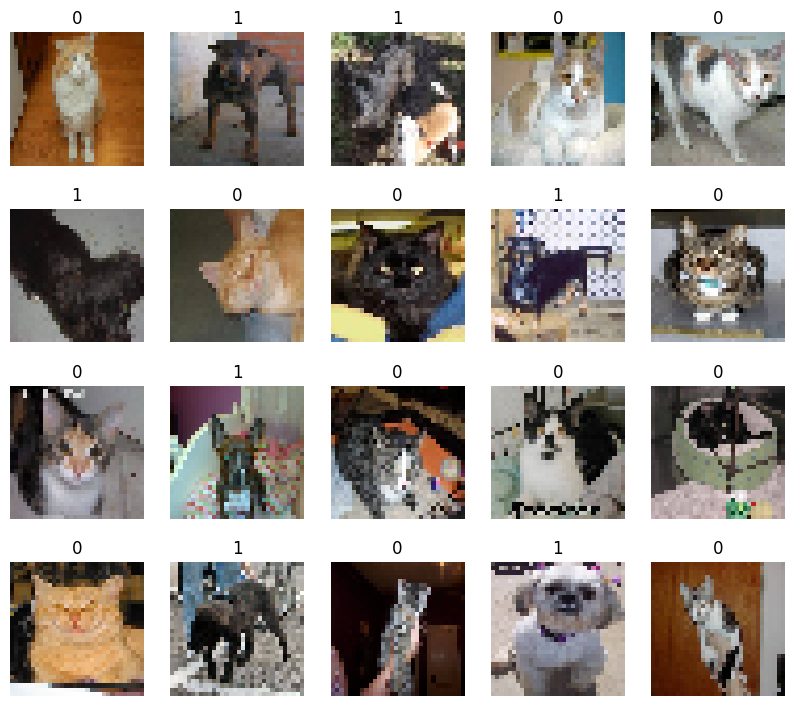

In [8]:
indices = np.random.randint(0,len(X_train),20)
show_images_batch(X_train[indices], names = y_train[indices])

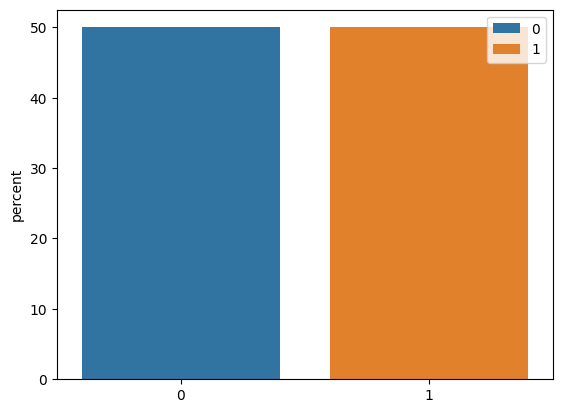

In [9]:
sns.countplot(x = y_train, stat = "percent", hue = y_train);

In [10]:
X_train = X_train/255
X_test = X_test/255

## MODELO DL

In [11]:
## Inicialización del modelo
#model = Sequential()

## Primera capa convolucional
#model.add(Conv2D(filters = 16, kernel_size = (5,5), padding = "Same", strides = (1,1), activation = "relu", input_shape = (32,32,3)))
## Primera capa pooling
#model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
## Primera capa dropout
##model.add(Dropout(rate = 0.25))

## Segunda capa convolucional
#model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = "Same", strides = (1,1), activation = "relu"))
## Segunda capa pooling
#model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
## Segunda capa dropout
##model.add(Dropout(rate = 0.5))

## Tercera capa convolucional
#model.add(Conv2D(filters = 64, kernel_size = (1,1), padding = "Same", strides = (1,1), activation = "relu"))
## Tercera capa pooling
#model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
## Tercera capa dropout
##model.add(Dropout(rate = 0.5))

In [12]:
## Capa de aplanado
#print("Entrada de la capa flatten:", model.output_shape)
#model.add(Flatten())
#print("Salida de la capa flatten:",model.output_shape)

In [13]:
## Capas densas
#model.add(Dense(256, activation = "relu"))
#model.add(Dense(128, activation = "relu"))
#model.add(Dense(64, activation = "sigmoid"))

In [40]:
capas = [keras.Input(shape = (32, 32, 3)),
         keras.layers.Conv2D(filters = 16, kernel_size = (5,5), padding = "Same", strides = (1,1), activation = "relu"),
         keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
         keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = "Same", strides = (1,1), activation = "relu"),
         keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),

         keras.layers.Flatten(),

         keras.layers.Dense(units = 256, activation = 'relu'),
         keras.layers.Dense(units = 32, activation = 'relu'),

         keras.layers.Dense(2, activation = 'softmax')]

# Creamos el modelo
model = keras.Sequential(capas)

In [41]:
# Optimizador
print(X_train.size)
optimizer = Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)

12288000


In [42]:
# Compilador
model.compile(optimizer = optimizer , loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [43]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 16)          │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 538,690 (2.05 MB)

 Trainable params: 538,690 (2.05 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
X_train.shape

(4000, 32, 32, 3)

## ENTRENAMIENTO

In [45]:
# Callbacks
cb_checkp = keras.callbacks.ModelCheckpoint("./data/model_check.keras")
cb_estop = keras.callbacks.EarlyStopping(patience = 20, restore_best_weights = True)

# Hiperparámetros
batch_size = 16
epochs = 200
validation_split = 0.2

# Train
history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_split = validation_split, callbacks = [cb_checkp, cb_estop])

Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6033 - loss: 0.6744 - val_accuracy: 0.0000e+00 - val_loss: 1.1612
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6402 - loss: 0.6360 - val_accuracy: 0.0300 - val_loss: 1.1388
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6898 - loss: 0.5765 - val_accuracy: 0.6975 - val_loss: 0.5719
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7254 - loss: 0.5387 - val_accuracy: 0.2975 - val_loss: 1.0115
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7538 - loss: 0.5095 - val_accuracy: 0.5575 - val_loss: 0.7489
Epoch 6/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7814 - loss: 0.4623 - val_accuracy: 0.5425 - val_loss: 0.7595
Epoch 7/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8138 - loss: 0.4088 - val_accuracy: 0.5487 - val_loss: 0.8617
Epoch 8/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8360 - loss: 0.3630 - val_

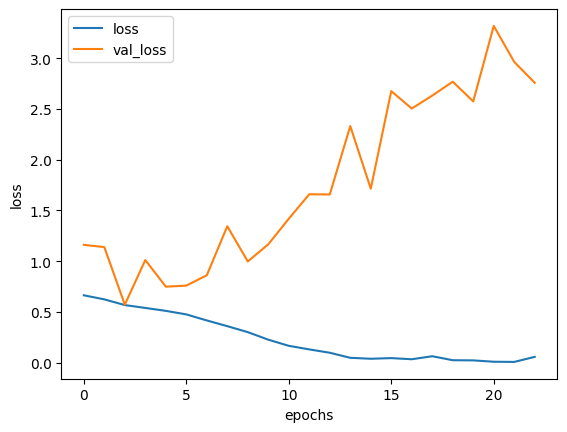

In [46]:
history_df = pd.DataFrame(history.history)
history_df[["loss","val_loss"]].plot()
plt.xlabel("epochs")
plt.ylabel("loss");

In [47]:
model.evaluate(X_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6918 - loss: 0.5813  


[0.5979211926460266, 0.6940000057220459]

In [48]:
y_pred = [np.argmax(predictions) for predictions in model.predict(X_test)]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.69      0.69       500
           1       0.69      0.70      0.70       500

    accuracy                           0.69      1000
   macro avg       0.69      0.69      0.69      1000
weighted avg       0.69      0.69      0.69      1000



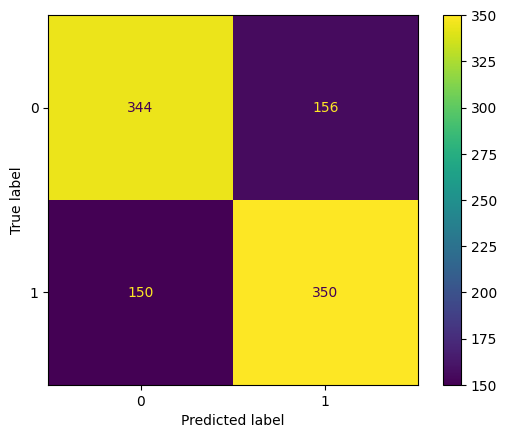

In [50]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [51]:
confianza = [prediction.max() for prediction in model.predict(X_test)]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [53]:
pred_df = pd.DataFrame({"True": y_test, "Predicted": y_pred, "Confianza": confianza})

In [54]:
error = pred_df["True"] != pred_df["Predicted"]
errores = pred_df[error].sort_values("Confianza", ascending = False)
errores

,True,Predicted,Confianza
680,1,0,0.996785
397,0,1,0.981395
537,1,0,0.980612
851,1,0,0.977628
923,1,0,0.951426
...,...,...,...
555,1,0,0.511383
247,0,1,0.510374
222,0,1,0.508139
578,1,0,0.503421


In [66]:
errores_1 = errores.loc[errores["True"] == 1].head(15)
lista_errores = errores_1.index.to_list()

errores_2 = errores.loc[errores["True"] == 0].head(15)
lista_errores = lista_errores + (errores_2.index.to_list())

lista_errores

[680,
 537,
 851,
 923,
 608,
 738,
 926,
 863,
 619,
 666,
 893,
 886,
 749,
 822,
 584,
 397,
 337,
 284,
 229,
 491,
 493,
 368,
 153,
 331,
 175,
 260,
 82,
 144,
 377,
 61]

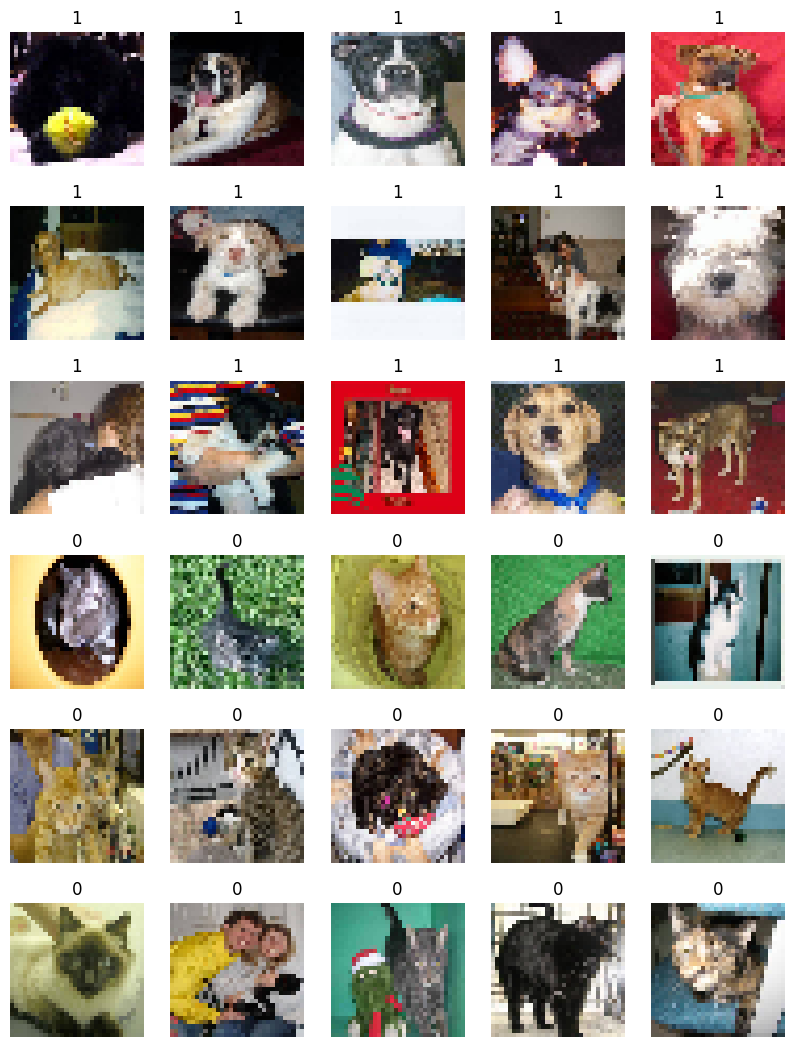

In [67]:
show_images_batch(X_test[lista_errores], names = y_test[lista_errores])